# Teste de Classificadores com ajuste de peso e modelos de arvore com up/downsampling 

O objetivo é testar os modelos XGBoost e adaBoost sem sampling e a floresta aleatoria e arvore de decisão com sampling, analisar qual deles tem a melhor metrica de recall para o banco de dados com todas as 4 tabelas e qual tem o melhor ponto de cotovelo na curva recall-precision.

## Preparar os dados e criar classe de processamento 

### Importando bibliotecas e dados

In [8]:
import pandas as pd

from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [9]:
%load_ext autoreload
%autoreload 2

import os, sys

#Importing path to main folder, subtitute with your own path
module_path = os.path.abspath(os.path.join('/Users/mhctds/visage-V1.1')) # or the path to your source code
sys.path.insert(0, module_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from src.data.DataProcessing import DataProcessing
from src.models.ModelProcessing import ModelProcessing
from src.metrics.MetricsProcessing import MetricsProcessing
from src.models.BertProcessing import BertProcessing

In [11]:
df_denuncia_crime=pd.read_csv('/Users/mhctds/Cidade_Social/base de dados/base_apps_denuncia_crime.csv')
df_base_rocinha=pd.read_csv('/Users/mhctds/Cidade_Social/base de dados/base_rocinha_df.csv')
df_protestos_2013=pd.read_csv('/Users/mhctds/Cidade_Social/base de dados/protestos_2013_df.csv')
df_protestos_PMES=pd.read_csv('/Users/mhctds/Cidade_Social/base de dados/protestos_PMES.csv')

### Criar classe de processamento

### Unir dataframes e separar em features e target

In [12]:
df_vector=[df_base_rocinha,df_denuncia_crime,df_protestos_2013,df_protestos_PMES]
DataProcess=DataProcessing()
df_final=DataProcess.append_data(df_vector)
df_final.info()
print(df_final.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 2038 entries, 0 to 503
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 2038 non-null   object 
 1   Total(SUM)           2037 non-null   float64
 2   Classe de Violência  2038 non-null   object 
dtypes: float64(1), object(2)
memory usage: 63.7+ KB
                                                text  Total(SUM)  \
0  RT @tvjornalsbt: "Morte" denuncia a precarieda...         8.0   
1  RT @tvjornalsbt: "Morte" denuncia a precarieda...         8.0   
2  "Morte" denuncia a precariedade da BR-101, na ...         8.0   
3  Terremoto de 7.1 no México. Onde vivo não pass...         7.0   
4  RT @vinigrilo1: Moradores com medo e assustado...         8.0   

  Classe de Violência  
0                High  
1                High  
2                High  
3                High  
4                High  


In [13]:
#df_final,train_data, test_data, train_target, test_target = DataProcess.division(df_final)
#train_target_ordered=train_target.reset_index(drop=True)

In [14]:
#DataProcess.export_vect()

In [15]:
#print(train_data.shape)

In [16]:
#train_target.info()
#print(train_target.unique())

In [17]:
df_final = df_final.drop_duplicates().reset_index()
target = df_final["Classe de Violência"]
tf_idf = DataProcess.text_preprocessing_nltk(df_final["text"])

## Testando Modelos de Classificação

### Modelo dummy

In [18]:
model=ModelProcessing.dummy_model(tf_idf,target)

['fit_time', 'score_time', 'test_accuracy', 'test_f1_weighted', 'test_precision_weighted', 'test_recall_weighted']
[0.0006401538848876953, 0.0028951168060302734, 0.682025974025974, 0.4651612346095463, 0.682025974025974, 0.5530949862475286]
best recall: 0.682025974025974
best accuracy: 0.682025974025974
best f1: 0.5530949862475286
best precision: 0.4651612346095463


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and bein

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.5287560398043514
stardard deviation APS: 0.0015671769031098766


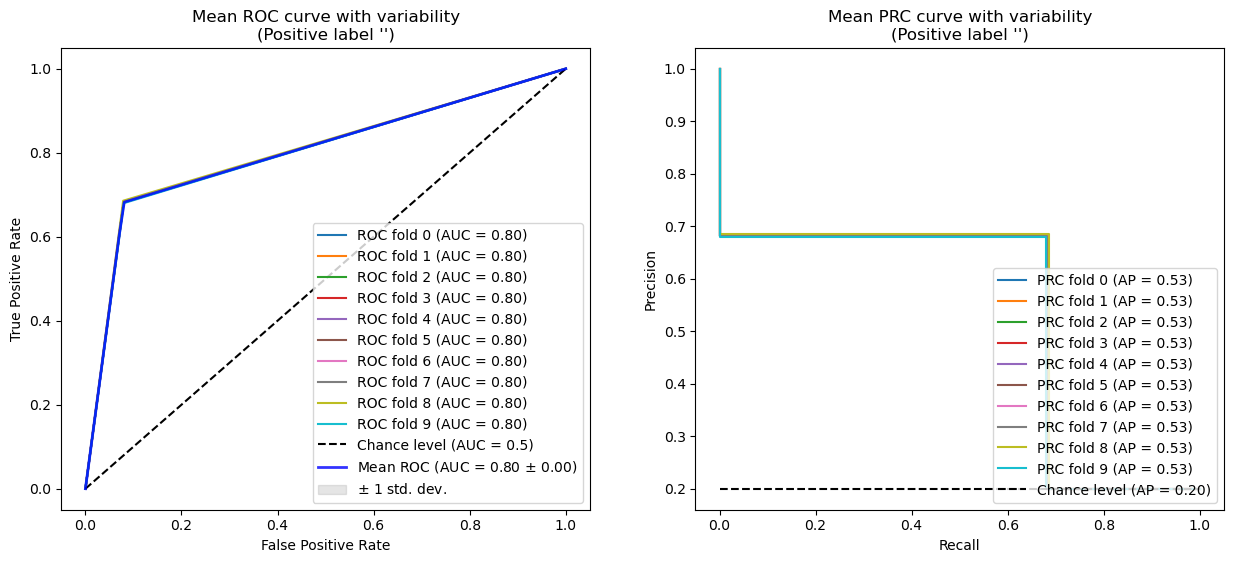

In [21]:
MetricsProcessing().evaluate_alt(model,tf_idf,target,n_splits=10)

### AdaBoost sem sampling

In [22]:
best_model=ModelProcessing.adaboost_model(tf_idf,target)

  0%|          | 0/99 [00:00<?, ?it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarn

best number of estimators: 1
best recall: 0.7417435064935065
best accuracy: 0.7417435064935065
best f1: 0.6782097110373002
best precision: 0.6846695848381481


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Mean APS: 0.6614322063268097
stardard deviation APS: 0.05985033073710797


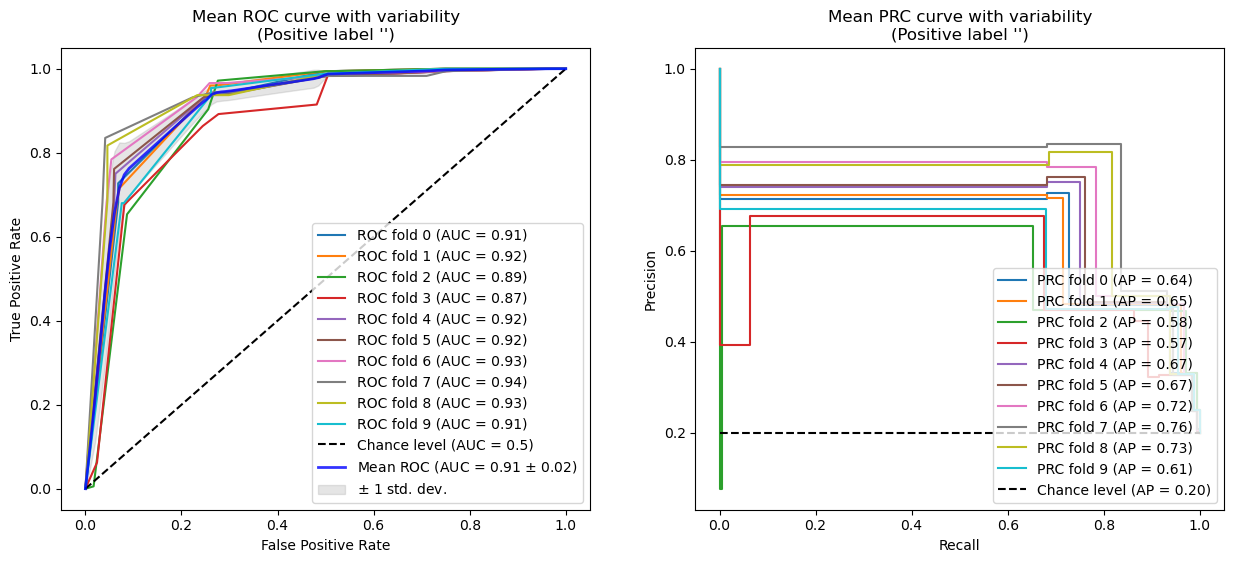

In [26]:
MetricsProcessing().evaluate_alt(best_model,tf_idf,target,n_splits=10)

### Floresta Aleatoria sem Sampling

In [ ]:
best_model=ModelProcessing.florest_model(tf_idf,target)

  0%|          | 0/49 [00:00<?, ?it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarni

best depth: 29
best size: 11
best recall: 0.7975609756097561
best accuracy: 0.7975609756097561
best f1: 0.7572619768620473
best precision: 0.7632119734895343


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mean APS: 0.8747369717648612
stardard deviation APS: 0.012032335455740843


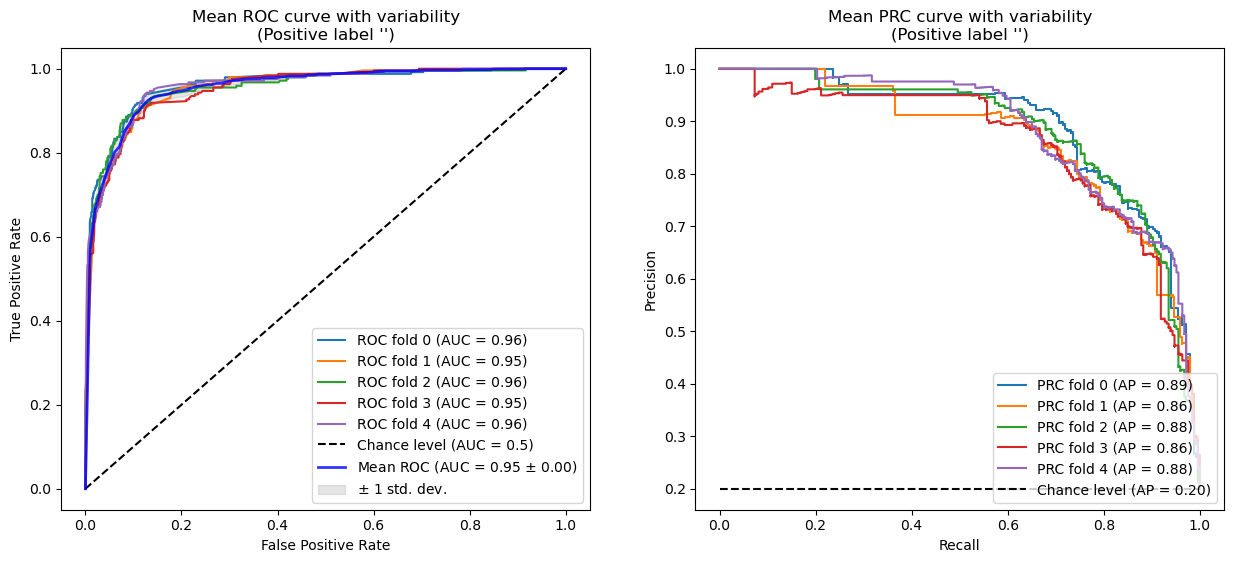

In [ ]:
MetricsProcessing().evaluate_alt(best_model,tf_idf,target,n_splits=10)

### Arvore de decisão sem Sampling

In [ ]:
tree_model=ModelProcessing.tree_model(tf_idf,target)

  0%|          | 0/99 [00:00<?, ?it/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarni

best depth: 35
best recall: 0.8121951219512195
best accuracy: 0.8121951219512195
best f1: 0.799901853113951
best precision: 0.7930048109374395


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mean APS: 0.6792179422573839
stardard deviation APS: 0.048468734919183194


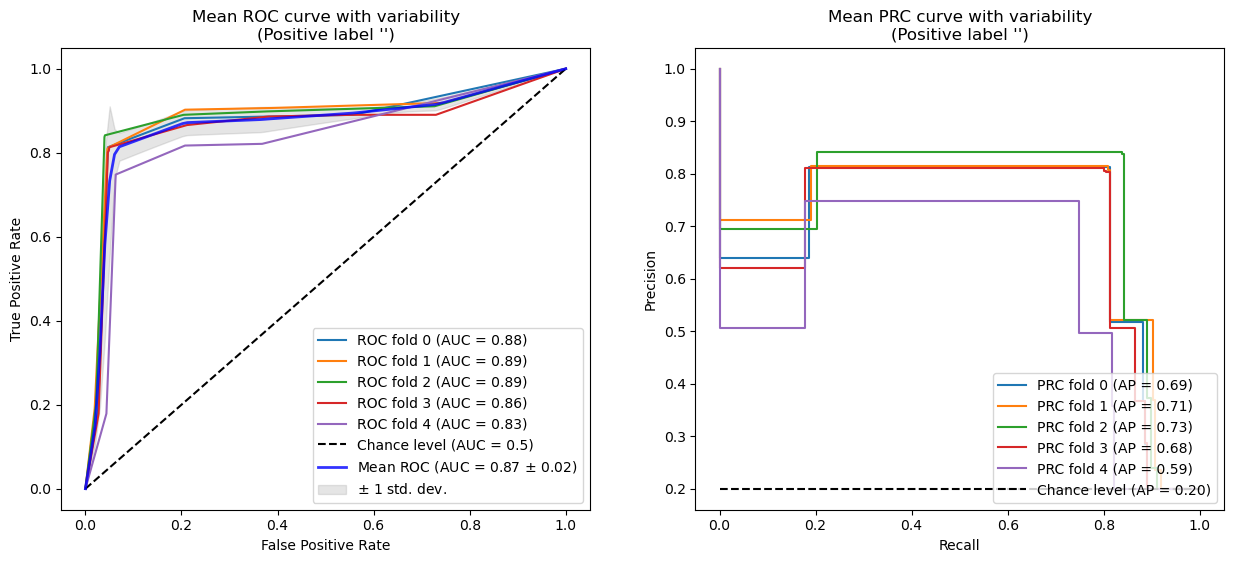

In [ ]:
MetricsProcessing().evaluate_alt(tree_model,tf_idf,target,n_splits=10)

### Naive-Bayes sem sampling

In [ ]:
model=ModelProcessing.naivebayes_model(tf_idf,target)

/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


['fit_time', 'score_time', 'test_accuracy', 'test_f1_weighted', 'test_precision_weighted', 'test_recall_weighted']
[0.03330111503601074, 0.01639719009399414, 0.724390243902439, 0.7654190222928292, 0.724390243902439, 0.739238693032941]
best recall: 0.724390243902439
best accuracy: 0.724390243902439
best f1: 0.739238693032941
best precision: 0.7654190222928292


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mean APS: 0.5692048383898474
stardard deviation APS: 0.02551570434385846


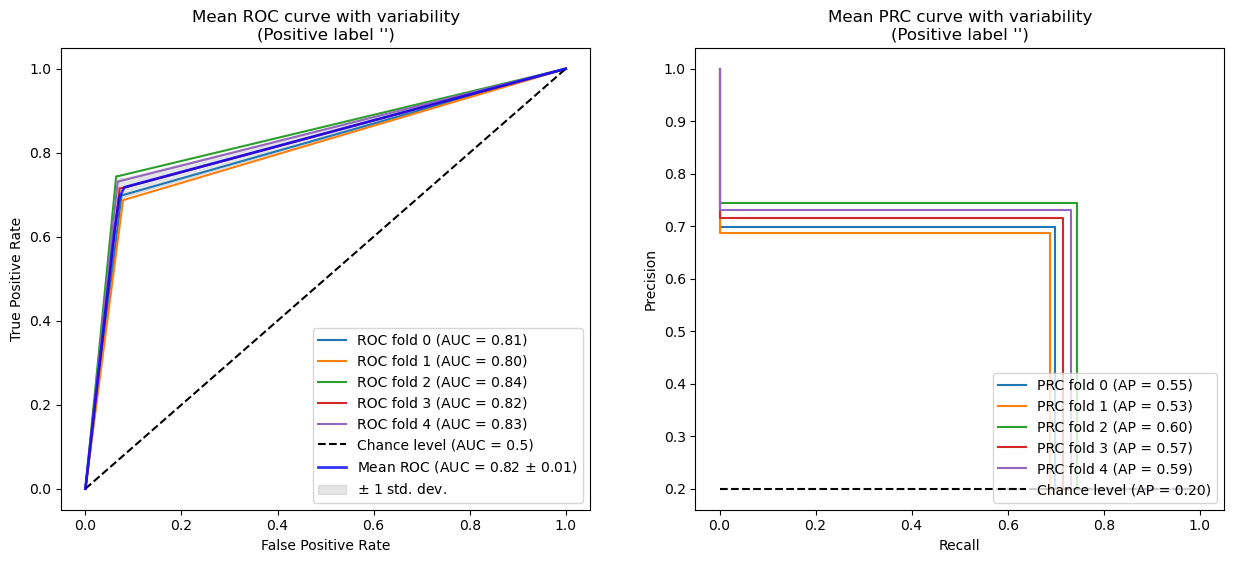

In [ ]:
MetricsProcessing().evaluate_alt(model,tf_idf,target,n_splits=10)

### BERTimbau sem sampling

In [ ]:
#temp=df_final.copy()
#bert_class=BertProcessing()
#train_dataset,test_dataset=bert_class.loader(df_final=temp)

Generating train split: 1230 examples [00:00, 63189.67 examples/s]
Generating test split: 528 examples [00:00, 132104.06 examples/s]
Map:   0%|          | 0/1230 [00:00<?, ? examples/s]/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Map: 100%|██████████| 528/528 [00:45<00:00, 11.58 examples/s]


In [ ]:
#features_train, target_train, features_test, target_test=DataProcess.bert_division(df_final=df_final)
#print(train_dataset)

Dataset({
    features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1230
})


In [ ]:
#model=bert_class.model(train_dataset,test_dataset)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
                                                 
 34%|███▎      | 155/462 [00:23<04:08,  1.24it/s]

{'eval_loss': 0.5665931701660156, 'eval_accuracy': 0.8276515151515151, 'eval_precision': 0.8206324172434507, 'eval_recall': 0.8276515151515151, 'eval_f1': 0.810432537088101, 'eval_runtime': 2.0586, 'eval_samples_per_second': 256.48, 'eval_steps_per_second': 32.06, 'epoch': 1.0}


                                                 
 67%|██████▋   | 309/462 [00:44<01:23,  1.84it/s]

{'eval_loss': 0.4169694483280182, 'eval_accuracy': 0.8712121212121212, 'eval_precision': 0.8253443073521943, 'eval_recall': 0.8712121212121212, 'eval_f1': 0.8452530489817783, 'eval_runtime': 1.3687, 'eval_samples_per_second': 385.763, 'eval_steps_per_second': 48.22, 'epoch': 2.0}


                                                 
100%|██████████| 462/462 [01:06<00:00,  6.90it/s]
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'eval_loss': 0.4378986656665802, 'eval_accuracy': 0.8806818181818182, 'eval_precision': 0.8555137433436553, 'eval_recall': 0.8806818181818182, 'eval_f1': 0.8656560212981124, 'eval_runtime': 1.3769, 'eval_samples_per_second': 383.472, 'eval_steps_per_second': 47.934, 'epoch': 3.0}
{'train_runtime': 66.911, 'train_samples_per_second': 55.148, 'train_steps_per_second': 6.905, 'train_loss': 0.40386847293738165, 'epoch': 3.0}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Generating train split: 1406 examples [00:00, 186472.46 examples/s]



Generating test split: 352 examples [00:00, 65005.06 examples/s]



/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



 20%|██        | 88/440 [09:56<39:44,  6.77s/it]

Map: 100%|██████████| 352/352 [00:29<00:00, 12.00 examples/s]
/Users/mhctds/visage-V

{'eval_loss': 0.7126556038856506, 'eval_accuracy': 0.8011363636363636, 'eval_precision': 0.7933153889403258, 'eval_recall': 0.8011363636363636, 'eval_f1': 0.7850033522343847, 'eval_runtime': 1.2611, 'eval_samples_per_second': 279.13, 'eval_steps_per_second': 34.891, 'epoch': 1.0}












                                         


                                                
                                              


 20%|██        | 88/440 [07:12<01:04,  5.48it/s]


{'eval_loss': 0.5874224305152893, 'eval_accuracy': 0.8323863636363636, 'eval_precision': 0.8000848896434636, 'eval_recall': 0.8323863636363636, 'eval_f1': 0.8105568140779408, 'eval_runtime': 0.8799, 'eval_samples_per_second': 400.038, 'eval_steps_per_second': 50.005, 'epoch': 2.0}





                                                
                                              

 20%|██        | 88/440 [07:32<01:04,  5.48it/s]

{'loss': 0.3756, 'grad_norm': 0.22827672958374023, 'learning_rate': 2.651515151515152e-06, 'epoch': 2.84}












                                         


                                                
                                              


 20%|██        | 88/440 [07:38<01:04,  5.48it/s]


{'eval_loss': 0.5956484079360962, 'eval_accuracy': 0.8352272727272727, 'eval_precision': 0.8196276822236013, 'eval_recall': 0.8352272727272727, 'eval_f1': 0.8268583751072573, 'eval_runtime': 0.9199, 'eval_samples_per_second': 382.637, 'eval_steps_per_second': 47.83, 'epoch': 3.0}





                                                
                                              

100%|██████████| 528/528 [01:16<00:00,  6.89it/s]


{'train_runtime': 76.6742, 'train_samples_per_second': 55.012, 'train_steps_per_second': 6.886, 'train_loss': 0.3670108083522681, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


['RT @tvjornalsbt: "Morte" denuncia a precariedade da BR-101, na Zona Sul do Recife https://t.co/RhGy3ouJGo https://t.co/kE84V6MpN1', '"Morte" denuncia a precariedade da BR-101, na Zona Sul do Recife https://t.co/RhGy3ouJGo https://t.co/kE84V6MpN1', 'Terremoto de 7.1 no México. Onde vivo não passou quase nada, mas na zona sul caíram muitos edifícios. Orem e ajude o povo mexicano.', 'RT @vinigrilo1: Moradores com medo e assustados.O fruto do sustento ao tráfico, é esse ! #rocinha https://t.co/FdPZzlHNlG', 'RT @gloriafperez: Não dá pra entender o silencio em torno do q está acontecendo na Rocinha! Bandidos barbarizando e ngm diz nada!', 'Não dá pra entender o silencio em torno do q está acontecendo na Rocinha! Bandidos barbarizando e ngm diz nada!', 'RT @vinigrilo1: Moradores com medo e assustados.O fruto do sustento ao tráfico, é esse ! #rocinha https://t.co/FdPZzlHNlG', 'RT @felipeoliver_rj: Enquanto isso na #Rocinha, maior favela da América Latina, o caos impera. Não foi lá que entrar

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1406 examples [00:00, 258354.13 examples/s]
Generating test split: 352 examples [00:00, 132924.73 examples/s]
Map: 100%|██████████| 352/352 [00:30<00:00, 11.64 examples/s]
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(











                                         


                                                
                                              


 20%|██        | 88/440 [11:53<01:04,  5.48it/s]


{'eval_loss': 1.1290680170059204, 'eval_accuracy': 0.7357954545454546, 'eval_precision': 0.7888688016528925, 'eval_recall': 0.7357954545454546, 'eval_f1': 0.7284577450851035, 'eval_runtime': 1.3537, 'eval_samples_per_second': 260.02, 'eval_steps_per_second': 32.503, 'epoch': 1.0}













                                         


                                                
                                              


 20%|██        | 88/440 [12:18<01:04,  5.48it/s]


{'eval_loss': 0.9677337408065796, 'eval_accuracy': 0.7698863636363636, 'eval_precision': 0.7928622159090909, 'eval_recall': 0.7698863636363636, 'eval_f1': 0.7586178045515396, 'eval_runtime': 1.0825, 'eval_samples_per_second': 325.16, 'eval_steps_per_second': 40.645, 'epoch': 2.0}





                                                
                                              

 20%|██        | 88/440 [12:38<01:04,  5.48it/s]

{'loss': 0.3696, 'grad_norm': 14.3649263381958, 'learning_rate': 2.651515151515152e-06, 'epoch': 2.84}













                                         


                                                
                                              


 20%|██        | 88/440 [12:44<01:04,  5.48it/s]


{'eval_loss': 0.9644542932510376, 'eval_accuracy': 0.7698863636363636, 'eval_precision': 0.825473392280577, 'eval_recall': 0.7698863636363636, 'eval_f1': 0.7809964567518044, 'eval_runtime': 1.1024, 'eval_samples_per_second': 319.305, 'eval_steps_per_second': 39.913, 'epoch': 3.0}





                                                
                                              

100%|██████████| 528/528 [01:16<00:00,  6.91it/s]


{'train_runtime': 76.4101, 'train_samples_per_second': 55.202, 'train_steps_per_second': 6.91, 'train_loss': 0.3628336281487436, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


['RT @ada_falou: O cuzão do 157 ganhou pela mata, peidou pra gente kkkk Rocinha tudo A até o final das contas ������', 'Ha minha Favela amada,silencio fúnebre ������ em Rocinha . Roupa Suja . https://t.co/MQK2ZmZhtg', 'Eu tô vivendo um pesadelo vendo a rocinha desse jeito', 'Recepcionista de Imobiliária - Imobiliária na Zona Sul de BH - Belo Horizonte, MG https://t.co/FVT1yGGmSv', 'RT @macaeada: quem é cria curte PedreiraCajuMacacos18VintémPrimaveraSão CarlosMineiraRocinhaVidigalJuramento77Rua da feiraMac…', 'Eu moro no morro, ela na zona sul... sou negão e a patricinha é loira do olho azul', 'queria que alguém me chamasse pra piar na baixada, zona sul ta xoxadona', 'Belíssima Casa de Alvenaria na Beira do Mar na Zona Sul - Casa com 03 suites, banheiro social,… https://t.co/EDIrF79rDT', 'RT @pedrojmoraes: 11. Eu sou muito pilhado pras coisas Se tu me chamar pra ir comprar cartolina lá na Zona Sul eu fecho contigo e azar', 'Lenka visar #upp sitt kök https://t.co/yCzZszsAqY', 'RT @Notici

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1406 examples [00:00, 291579.30 examples/s]
Generating test split: 352 examples [00:00, 150683.30 examples/s]
Map: 100%|██████████| 352/352 [00:26<00:00, 13.44 examples/s]
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(












                                         


                                                
                                              


 20%|██        | 88/440 [16:50<01:04,  5.48it/s]


{'eval_loss': 0.3005918264389038, 'eval_accuracy': 0.9119318181818182, 'eval_precision': 0.8607382136946452, 'eval_recall': 0.9119318181818182, 'eval_f1': 0.8836688480438479, 'eval_runtime': 1.1258, 'eval_samples_per_second': 312.677, 'eval_steps_per_second': 39.085, 'epoch': 1.0}














                                         


                                                
                                              


 20%|██        | 88/440 [17:14<01:04,  5.48it/s]


{'eval_loss': 0.285656213760376, 'eval_accuracy': 0.9204545454545454, 'eval_precision': 0.8964918237250554, 'eval_recall': 0.9204545454545454, 'eval_f1': 0.9028154561487896, 'eval_runtime': 1.1226, 'eval_samples_per_second': 313.551, 'eval_steps_per_second': 39.194, 'epoch': 2.0}





                                                
                                              

 20%|██        | 88/440 [17:34<01:04,  5.48it/s]

{'loss': 0.4089, 'grad_norm': 1.2644013166427612, 'learning_rate': 2.651515151515152e-06, 'epoch': 2.84}















                                         


                                                
                                              


 20%|██        | 88/440 [17:39<01:04,  5.48it/s]


{'eval_loss': 0.33858564496040344, 'eval_accuracy': 0.8892045454545454, 'eval_precision': 0.8913392636974238, 'eval_recall': 0.8892045454545454, 'eval_f1': 0.888697136402568, 'eval_runtime': 1.1493, 'eval_samples_per_second': 306.281, 'eval_steps_per_second': 38.285, 'epoch': 3.0}





                                                
                                              

100%|██████████| 528/528 [01:13<00:00,  7.18it/s]


{'train_runtime': 73.5863, 'train_samples_per_second': 57.32, 'train_steps_per_second': 7.175, 'train_loss': 0.3970978756745656, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


['com esses bglhs acontecendo aq na rocinha vou até evitar vim curtir emoções amh ��', 'RT @JornalOGlobo: ‘Apesar do nome, sou capitalista’, diz Karl Max, preso por tráfico de drogas no Rio. http://t.co/0OnFL541w5 http://t.co/T…', 'tiros no morro do Juramento!!', '#JURAMENTO | TIROTEIO - Evitem a área do Juramento, Vicente de Carvalho. Tiroteio intenso no momento, muito bala voando.', 'RT @LeiSecaRJ: RT @AlertaCascadura: Juramento,não houve tiros e sim fogos,provavelmente p/avisar a presença da pm q está c/apoio helicóptero', '#ATENÇÃO Relatos de um intenso tiroteio no juramento. Evitem o local @RJ40caos @LeiSecaRJ', 'RT @LeiSecaRJ: RT @FernandoRodoxMC: A bala tá comendo solta na Presidente Vargas c/ Passos, vários policiais correndo entre os carros', 'RT @FernandoWalsh7: @AlertaAssaltoRJ Intenso tiroteio em Madureira. Entre o Parque Madureira e a favela do Cajueiro.', 'RT @LeiSecaRJ: RT @NiteroiRadar: Via DM- Tiroteio continua. Evitem a Mario Vianna e Estr da Garganta.', 'RT @LeiSecaR

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1407 examples [00:00, 164255.89 examples/s]
Generating test split: 351 examples [00:00, 78279.40 examples/s]
Map: 100%|██████████| 351/351 [03:26<00:00,  1.70 examples/s]
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(











                                         


                                                
                                              


 20%|██        | 88/440 [24:56<01:04,  5.48it/s]


{'eval_loss': 0.32891494035720825, 'eval_accuracy': 0.9145299145299145, 'eval_precision': 0.8613837008898738, 'eval_recall': 0.9145299145299145, 'eval_f1': 0.8856429974442397, 'eval_runtime': 1.2706, 'eval_samples_per_second': 276.237, 'eval_steps_per_second': 34.628, 'epoch': 1.0}













                                         


                                                
                                              


 20%|██        | 88/440 [28:18<01:04,  5.48it/s]


{'eval_loss': 0.37099093198776245, 'eval_accuracy': 0.9116809116809117, 'eval_precision': 0.854531247160588, 'eval_recall': 0.9116809116809117, 'eval_f1': 0.8816722735999455, 'eval_runtime': 1.058, 'eval_samples_per_second': 331.75, 'eval_steps_per_second': 41.587, 'epoch': 2.0}





                                                
                                              

 20%|██        | 88/440 [28:38<01:04,  5.48it/s]

{'loss': 0.4181, 'grad_norm': 4.016554355621338, 'learning_rate': 2.651515151515152e-06, 'epoch': 2.84}













                                         


                                                
                                              


 20%|██        | 88/440 [28:44<01:04,  5.48it/s]


{'eval_loss': 0.3685433268547058, 'eval_accuracy': 0.8917378917378918, 'eval_precision': 0.8493609063229316, 'eval_recall': 0.8917378917378918, 'eval_f1': 0.867483022451576, 'eval_runtime': 1.0626, 'eval_samples_per_second': 330.321, 'eval_steps_per_second': 41.408, 'epoch': 3.0}





                                                
                                              

100%|██████████| 528/528 [04:14<00:00,  2.08it/s]


{'train_runtime': 254.2332, 'train_samples_per_second': 16.603, 'train_steps_per_second': 2.077, 'train_loss': 0.41104295669179974, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


['#FiquemAtentos RT @gracapaes: tiros e fogos ao mesmo tempo no morro São José Operário na Praça Seca. Há horas!!!', 'RT @AlertaCascadura: Muitos tiros estão sendo ouvidos na região de Thomas Coelho e Eng da Rainha. Evitem a região Clima muito tenso.', 'Manifestantes estão queimando lixeiras na Av. Rio Branco com Rua da Carioca. PM no local', 'RT @paulalagrotta: @LeiSecaRJ passei na Av. Brasil agora, altura de Parada de Lucas, ouvindo tiroteio', 'RT @alertario24hrs: RT @meireles_sergio: muitos tiros há mais de 10 minutos em Copacabana próximo ao Cantagalo. Que passa?', '@_estelacarvalho ol\\u00e1, Estela! pode nos informar em que local e hor\\u00e1rio foram esses tiros?', '@britopri__ ol\\u00e1, Priscila! esse tiroteio foi agora? sabe dizer em que local ele ocorreu?', '@NaniCito99 ol\\u00e1! pode dizer em que local foram os tiros?', '@dobrevenport Boa noite. Onde s\\u00e3o os tiros?', '@tuzinsrs Boa tarde. Onde s\\u00e3o os tiros?', 'Madureira ta um caos, tem fila de brt até Campinho, 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1407 examples [00:00, 304682.00 examples/s]
Generating test split: 351 examples [00:00, 142572.22 examples/s]
Map: 100%|██████████| 351/351 [01:16<00:00,  4.60 examples/s]
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(











                                         


                                                
                                              


 20%|██        | 88/440 [44:53<01:04,  5.48it/s]


{'eval_loss': 1.0190174579620361, 'eval_accuracy': 0.7692307692307693, 'eval_precision': 0.7046913580246913, 'eval_recall': 0.7692307692307693, 'eval_f1': 0.7194297765726337, 'eval_runtime': 1.1791, 'eval_samples_per_second': 297.688, 'eval_steps_per_second': 37.317, 'epoch': 1.0}













                                         


                                                
                                              


 20%|██        | 88/440 [45:18<01:04,  5.48it/s]


{'eval_loss': 0.9919450879096985, 'eval_accuracy': 0.7777777777777778, 'eval_precision': 0.7365296466671586, 'eval_recall': 0.7777777777777778, 'eval_f1': 0.7363258479996361, 'eval_runtime': 0.9764, 'eval_samples_per_second': 359.477, 'eval_steps_per_second': 45.063, 'epoch': 2.0}





                                                
                                              

 20%|██        | 88/440 [45:38<01:04,  5.48it/s]

{'loss': 0.3727, 'grad_norm': 4.588788032531738, 'learning_rate': 2.651515151515152e-06, 'epoch': 2.84}













                                         


                                                
                                              


 20%|██        | 88/440 [45:43<01:04,  5.48it/s]


{'eval_loss': 1.116597294807434, 'eval_accuracy': 0.7663817663817664, 'eval_precision': 0.7394106784350687, 'eval_recall': 0.7663817663817664, 'eval_f1': 0.7273732132287128, 'eval_runtime': 0.9544, 'eval_samples_per_second': 367.768, 'eval_steps_per_second': 46.102, 'epoch': 3.0}





                                                
                                              

100%|██████████| 528/528 [02:26<00:00,  3.59it/s]


{'train_runtime': 146.8955, 'train_samples_per_second': 28.735, 'train_steps_per_second': 3.594, 'train_loss': 0.35987053405154834, 'epoch': 3.0}


/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


['#ALERTA_ASSALTO RT @BarbosaTannay: Constantes assaltos na Rua Cordovil próximo a Clinica da Familia', 'RT @marpe150: Não adianta pedir ao 31o. BPM! Região da Praça Pimentinha cheia de menores praticando roubos contra pedestres.', 'RT @AtentaSilva: Opa vamos ver quem ver mais assaltos no centro da Cidade, estou agora no KFC na São José e + 1 ficou sem celular agora!!', 'RT @kinhomba: 2 menores (morenos, sem camisa, aproximadamente 1,60, um deles de bone vermelho) assaltando em frente ao Campo de Santana', 'RT @LeiSecaRJ: RT @MarcosPVBoas: Muito cuidado ao passar na 24 de maio,entre a Silva Freire e Engenho Novo. 2 garotos roubando neste local.', 'RT @LeiSecaRJ: RT @Raquelcrisbr: Rua Ituverava no anil em JPA pede socorro assaltos frequentes', 'RT @LeiSecaRJ: RT @luisvasboemios: Assalto nesse instante na Francisco Bicalho esquina com a rua Pedro ll...kd policiamento?', 'RT @jrgshanks: Os assaltos acontecem costantemente na Av. PresVargas na pista lateral sent Pça da Bandeira, na alt da 

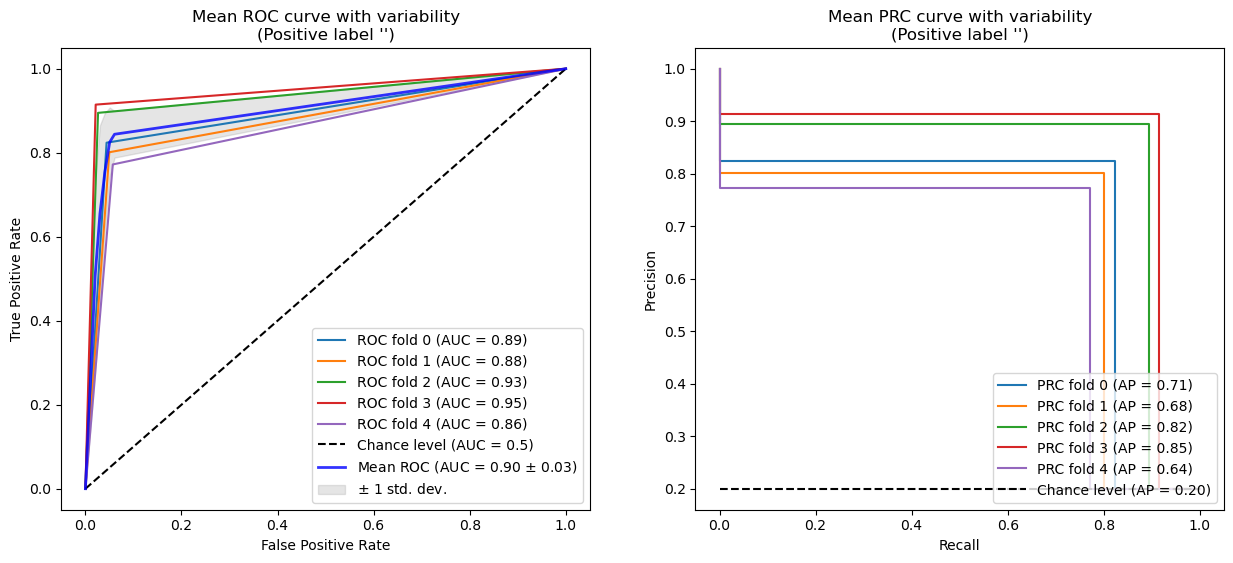

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating train split: 1758 examples [00:00, 163719.22 examples/s]
Generating test split: 351 examples [00:00, 51687.00 examples/s]
Map: 100%|██████████| 351/351 [00:59<00:00,  5.87 examples/s]
/Users/mhctds/visage-V1.1/env/lib/python3.8/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(














































                                         


                                                
                                              


 20%|██        | 88/440 [55:21<01:04,  5.48it/s]


{'eval_loss': 0.33492833375930786, 'eval_accuracy': 0.8945868945868946, 'eval_precision': 0.8747448673876412, 'eval_recall': 0.8945868945868946, 'eval_f1': 0.883984117731016, 'eval_runtime': 9.2901, 'eval_samples_per_second': 37.782, 'eval_steps_per_second': 4.736, 'epoch': 1.0}















































                                         


                                                
                                              


 20%|██        | 88/440 [58:56<01:04,  5.48it/s]


{'eval_loss': 0.21450647711753845, 'eval_accuracy': 0.9373219373219374, 'eval_precision': 0.924766034083951, 'eval_recall': 0.9373219373219374, 'eval_f1': 0.9304415903218556, 'eval_runtime': 7.4876, 'eval_samples_per_second': 46.877, 'eval_steps_per_second': 5.876, 'epoch': 2.0}





                                                
                                              

 20%|██        | 88/440 [59:36<01:04,  5.48it/s]

{'loss': 0.2894, 'grad_norm': 0.07744438946247101, 'learning_rate': 1.2121212121212122e-05, 'epoch': 2.27}


























                                         


                                                
                                              


 20%|██        | 88/440 [1:01:28<01:04,  5.48it/s]


{'eval_loss': 0.19047777354717255, 'eval_accuracy': 0.9458689458689459, 'eval_precision': 0.9337743771673824, 'eval_recall': 0.9458689458689459, 'eval_f1': 0.9391251501427669, 'eval_runtime': 3.55, 'eval_samples_per_second': 98.873, 'eval_steps_per_second': 12.394, 'epoch': 3.0}





                                                  
                                              

100%|██████████| 660/660 [10:05<00:00,  1.09it/s]]

{'train_runtime': 605.4041, 'train_samples_per_second': 8.712, 'train_steps_per_second': 1.09, 'train_loss': 0.2550678686662154, 'epoch': 3.0}


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(29794, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
bert_class=BertProcessing()
bert_class.evaluate_alt(df_final["text"],df_final["Classe de Violência"], n_splits=10)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


          train  test
Acurácia    NaN   NaN
F1          NaN   NaN
APS        0.88  0.79
ROC AUC    0.96  0.92


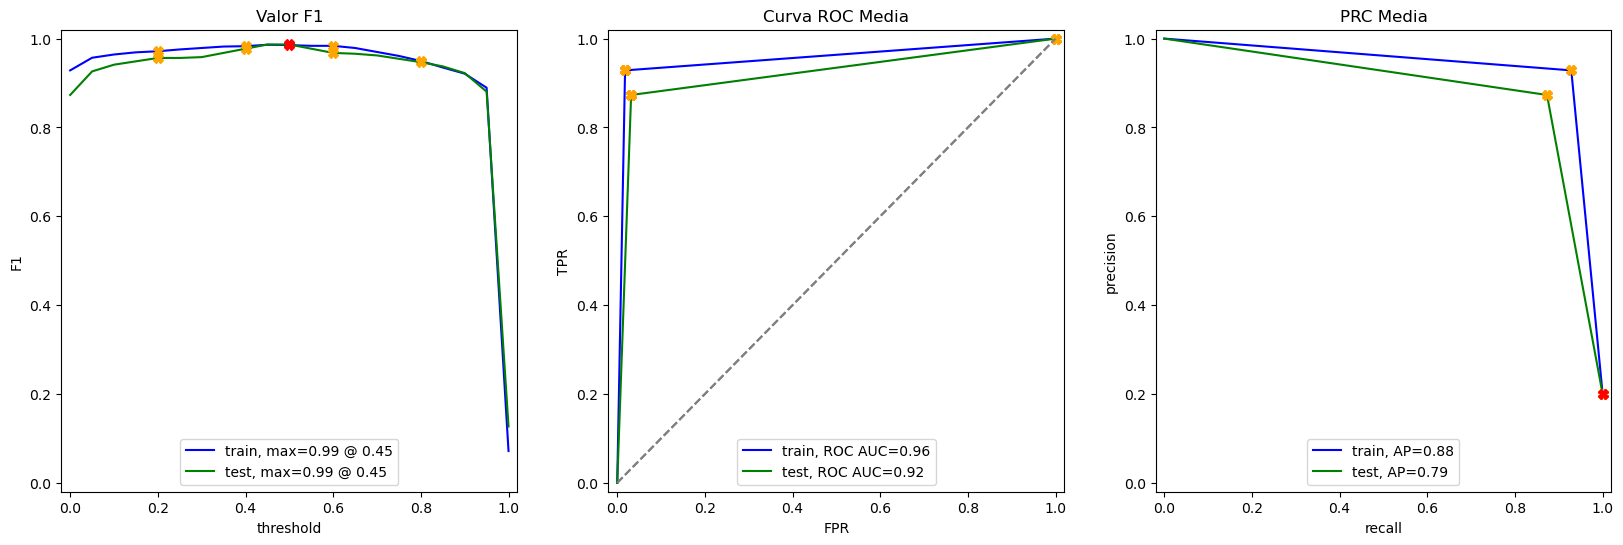

In [ ]:
#bert_class.evaluate(model,train_dataset,test_dataset)

In [ ]:
#df_sampled,garbage=train_test_split(temp.drop_duplicates().reset_index(), test_size=0.3, random_state=12345,shuffle=True,stratify=df_final['Classe de Violência'])

In [ ]:
#prediction=DataProcess.convert_label(bert_class.predict(model,garbage['text'])[:]['label'])

In [ ]:
#temp2=test_target.copy()
#recall=recall_score(DataProcess.numerical_target(temp2),prediction,average='weighted')
#acc=accuracy_score(temp2,prediction)
#f1=f1_score(temp2,prediction,average='weighted')
#precision=precision_score(temp2,prediction,average='weighted',zero_division=0)
#print('best recall:',recall)
#print('best accuracy:',acc)
#print('best f1:',f1)
#print('best precision:',precision)

best recall: 0.8806818181818182
best accuracy: 0.8806818181818182
best f1: 0.8700460994237051
best precision: 0.8619804463554464


## Sampling os dados

In [ ]:
features_sampled,target_sampled=DataProcess.upsampled_division(df_final)

In [ ]:
test_target

941     Not Violence
1053    Not Violence
21      Not Violence
1372       VeryHight
1614    Not Violence
            ...     
1386            High
1563    Not Violence
855        VeryHight
394        VeryHight
892        VeryHight
Name: Classe de Violência, Length: 528, dtype: object

### AdaBoost com sampling

In [ ]:
best_model=ModelProcessing.adaboost_model(features_sampled,target_sampled,test_data,test_target)

  0%|          | 0/99 [00:00<?, ?it/s]

best number of estimators: 5
best recall: 0.017045454545454544
best accuracy: 0.017045454545454544
best f1: 0.016038288482548443
best precision: 0.1757664400080837


          train  test
Acurácia    NaN   NaN
F1          NaN   NaN
APS        0.34  0.33
ROC AUC    0.66  0.64


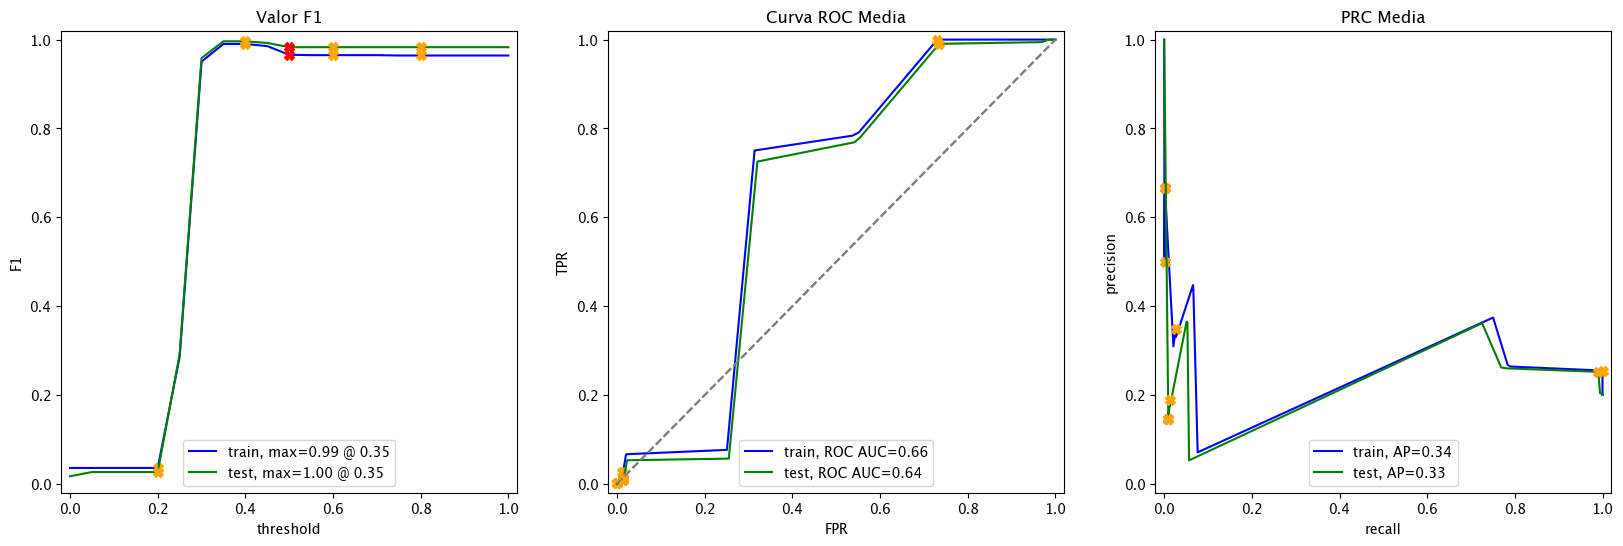

In [ ]:
MetricsProcessing().evaluate_model(best_model,train_data.toarray(),train_target,test_data.toarray(),test_target)

### Floresta Aleatoria com Sampling

In [ ]:
best_model=ModelProcessing.florest_model(features_sampled,target_sampled,test_data,test_target)

  0%|          | 0/49 [00:00<?, ?it/s]

best depth: 29
best size: 21
best recall: 0.7632575757575758
best accuracy: 0.7632575757575758
best f1: 0.7237333848128602
best precision: 0.7937946306755943


          train  test
Acurácia    NaN   NaN
F1          NaN   NaN
APS        0.90  0.81
ROC AUC    0.97  0.93


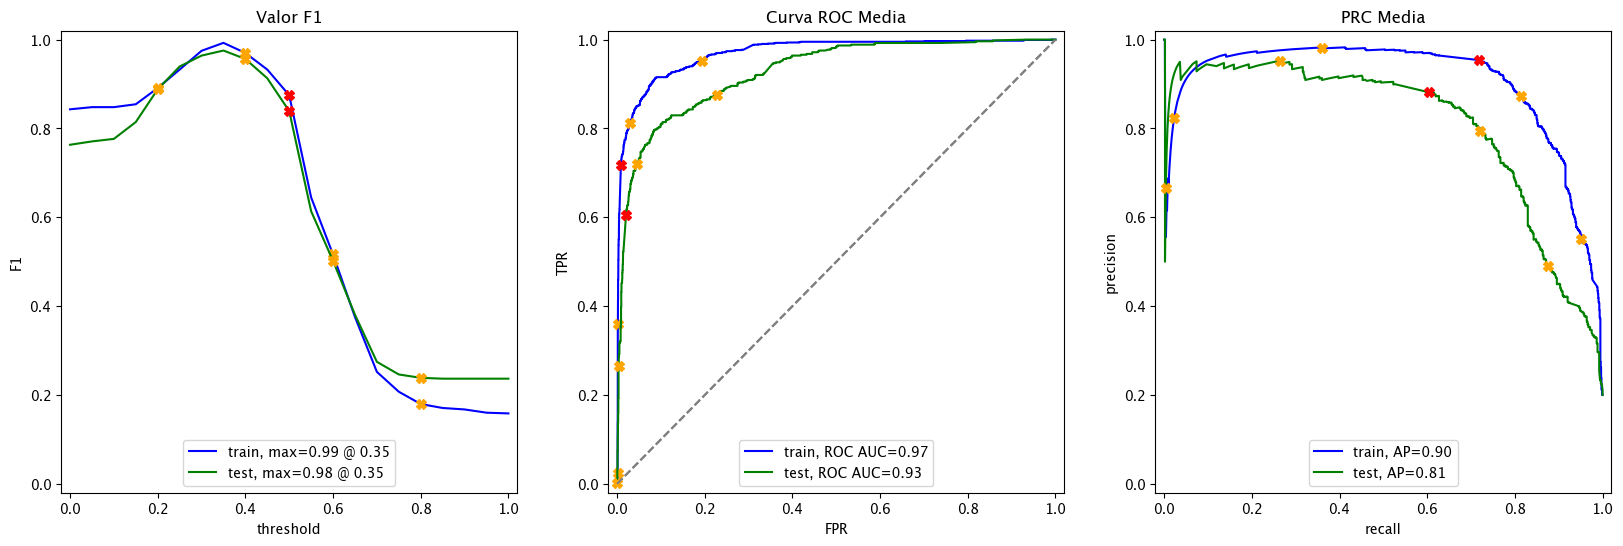

In [ ]:
MetricsProcessing().evaluate_model(best_model,train_data.toarray(),train_target,test_data.toarray(),test_target)

### Arvore de decisão com Sampling

In [ ]:
best_model=ModelProcessing.tree_model(features_sampled,target_sampled,test_data,test_target)

tree_model_upsampling=best_model

  0%|          | 0/99 [00:00<?, ?it/s]

best depth: 38
best recall: 0.7954545454545454
best accuracy: 0.7954545454545454
best f1: 0.788440383620773
best precision: 0.8106343557476484


          train  test
Acurácia    NaN   NaN
F1          NaN   NaN
APS        0.97  0.68
ROC AUC    0.99  0.88


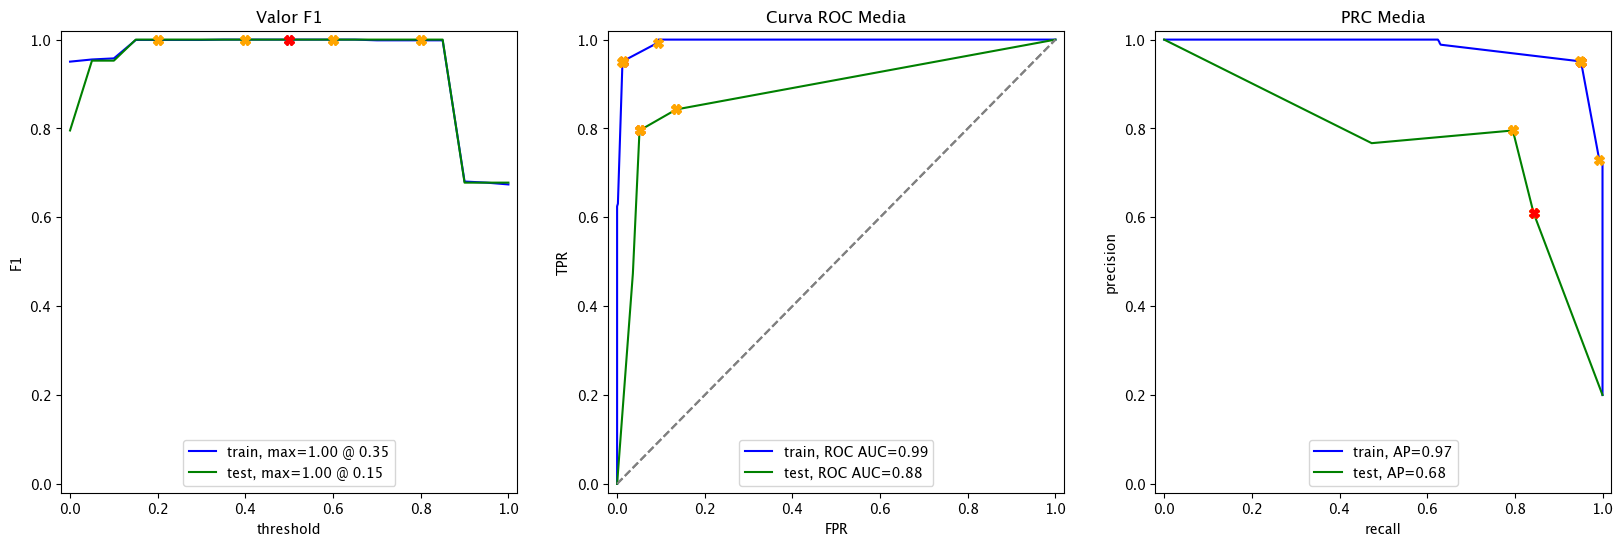

In [ ]:
MetricsProcessing().evaluate_model(best_model,train_data.toarray(),train_target,test_data.toarray(),test_target)

### Naive-Bayes com sampling

In [ ]:
model=ModelProcessing.naivebayes_model(features_sampled,target_sampled,test_data,test_target)

best recall: 0.7329545454545454
best accuracy: 0.7329545454545454
best f1: 0.7511976381461676
best precision: 0.7753840488215488


          train  test
Acurácia    NaN   NaN
F1          NaN   NaN
APS        0.91  0.59
ROC AUC    0.97  0.83


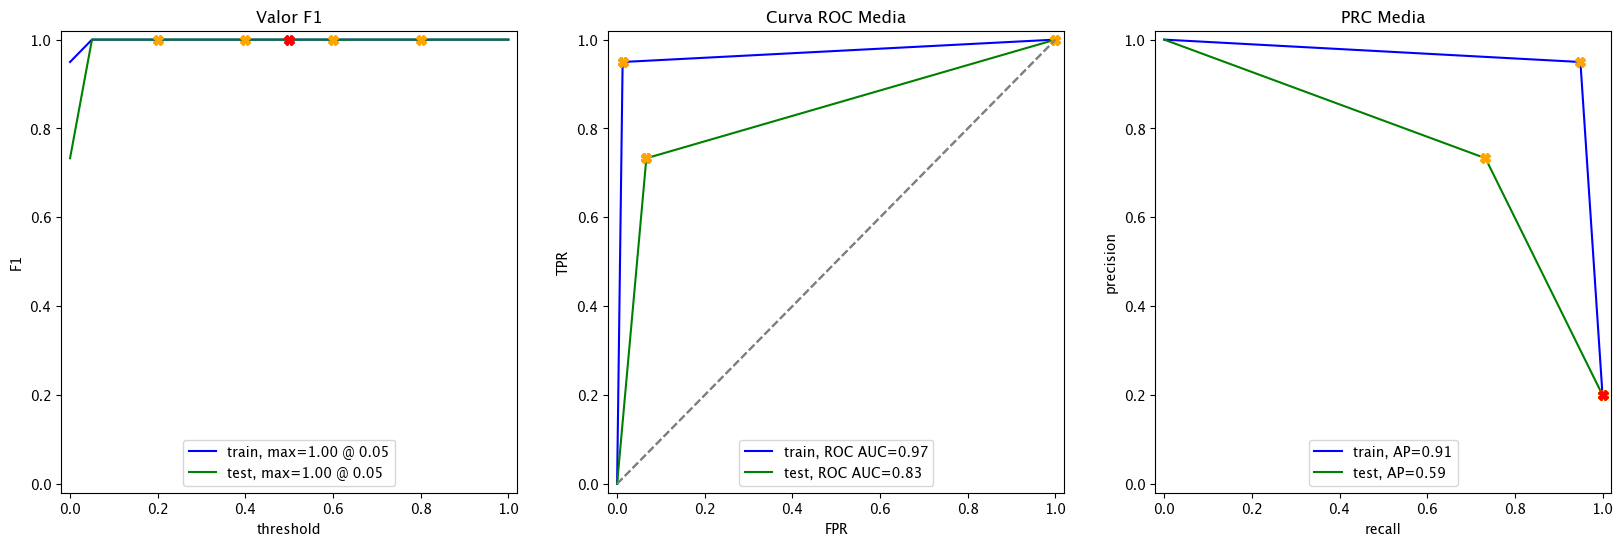

In [ ]:
MetricsProcessing().evaluate_model(model,train_data.toarray(),train_target,test_data.toarray(),test_target)

## Analise da complexidade dos dados sem sampling vs com sampling usando PCA

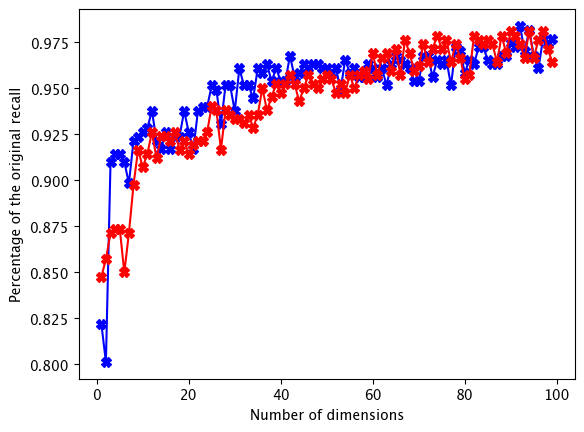

In [ ]:
MetricsProcessing.pca_evaluator(model=tree_model,model2=tree_model_upsampling,test_data=test_data,test_target=test_target,n_components=100)

# Conclusões

Por enquanto o melhor modelo entre eles, sem contar o XGBoost, parece ser a arvore de decisão.

Parece valer a pena testar a vetorização com por NILC quando testarmos regressão.

Normalização da uma pequena melhora em alguns dos modelos, mas talvez seja por coincidencia (a seed ser boa para aquele novo formato de matriz especifica)